In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
from glob import glob
from itertools import product

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import pandas as pd
import seaborn as sns

from pathlib import Path
from sbibm.utils.io import get_tensor_from_csv

In [12]:
root = Path("/home/ben/sci/cnre/infinite/")
glob(str(root / "joint/*/*/validation_loss.csv.bz2"))

623

## validation loss infinite joint

In [40]:
files = [
    "metrics-3layer-reuse-false.csv",
    "metrics-2layer-reuse-false.csv", 
]
df = pd.concat([pd.read_csv(file, index_col=0) for file in files], ignore_index=True)
print(len(df))
print(df["algorithm"].unique())
print(df["task"].unique())
print(df["num_atoms"].unique())

611
['NRE-B' 'CNRE']
['slcp' 'two_moons' 'gaussian_mixture']
[200 100 150  10  25  75   2  50]


[('NRE-B', 'gaussian_mixture', 10, 3), ('NRE-B', 'gaussian_mixture', 10, 2), ('NRE-B', 'gaussian_mixture', 2, 3), ('NRE-B', 'gaussian_mixture', 2, 2)]


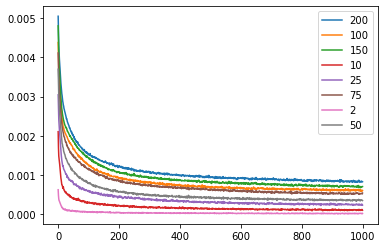

In [67]:
columns = ["algorithm", "task", "num_atoms", "num_blocks"]
grp = df.groupby(columns)

options = (["NRE-B"], df["task"].unique(), df["num_atoms"].unique(), df["num_blocks"].unique())
categories = list(product(*options))

subdfs = []
failed = []
for cat in categories:
    try:
        subdfs.append(grp.get_group(cat).iloc[[0], :])
    except KeyError:
        failed.append(cat)
        continue
    # paths.append(Path(subdf.iloc[0]["path"]) / "validation_loss.csv.bz2")
    # deets.append(cat)
subdf = pd.concat(subdfs)
print(failed)

d = subdf[(subdf["task"] ==  "slcp") & (subdf["num_blocks"] == 2)]
fig, ax = plt.subplots()
for _, row in d.iterrows():
    ax.plot(get_tensor_from_csv(Path(row["path"]) / "validation_loss.csv.bz2"), label=row["num_atoms"])
ax.legend()

[]


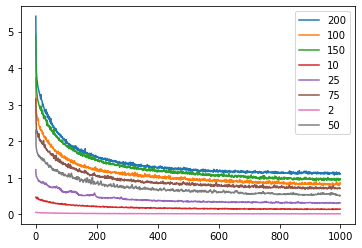

In [72]:
columns = ["algorithm", "task", "num_atoms", "num_blocks", "gamma"]
grp = df.groupby(columns)

options = (["CNRE"], df["task"].unique(), df["num_atoms"].unique(), df["num_blocks"].unique(), [0.01])
categories = list(product(*options))

subdfs = []
failed = []
for cat in categories:
    try:
        subdfs.append(grp.get_group(cat).iloc[[0], :])
    except KeyError:
        failed.append(cat)
        continue
    # paths.append(Path(subdf.iloc[0]["path"]) / "validation_loss.csv.bz2")
    # deets.append(cat)
subdf = pd.concat(subdfs)
print(failed)

d = subdf[(subdf["task"] ==  "slcp") & (subdf["num_blocks"] == 2)]
fig, ax = plt.subplots()
for _, row in d.iterrows():
    ax.plot(get_tensor_from_csv(Path(row["path"]) / "validation_loss.csv.bz2"), label=row["num_atoms"])
ax.legend()

In [3]:
experiment_folders = {
    "slcp": root / "outputs/2022-04-18/17-17-25",
    "two_moons": root / "outputs/2022-04-18/18-04-06",
    "gaussian_mixture": root / "outputs/2022-04-18/18-11-35",
    "gaussian_linear_uniform": root / "outputs/2022-04-18/18-24-56",
    # "slcp-big": root / "multirun/2022-04-19/10-20-49/2",
    # "two_moons-big": root / "multirun/2022-04-19/10-20-49/0",
    # "gaussian_mixture-big": root / "multirun/2022-04-19/10-20-49/1",
    # "gaussian_linear_uniform-big": root / "multirun/2022-04-19/10-20-49/3",
}
filename = "validation_loss.csv.bz2"

FileNotFoundError: [Errno 2] No such file or directory: '/home/ben/sci/cnre/infinite/outputs/2022-04-18/17-17-25/validation_loss.csv.bz2'

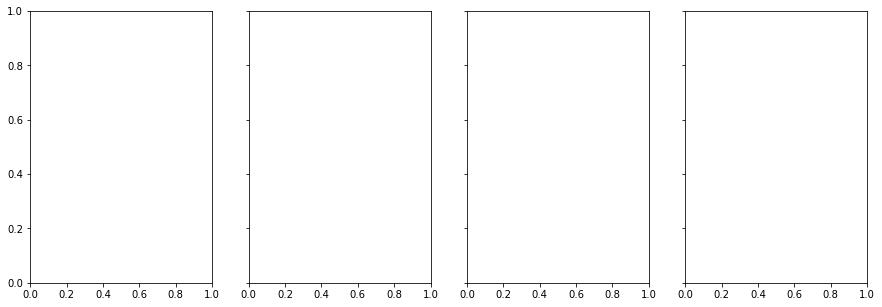

In [4]:
fig, axes = plt.subplots(ncols=len(experiment_folders), sharey="row", figsize=(15,5))
for ax, (name, experiment_folder) in zip(axes.flatten(), experiment_folders.items()):
    validation_loss = get_tensor_from_csv(experiment_folder / filename)
    ax.semilogy(validation_loss)
    # ax.loglog(validation_loss)
    ax.set_title(name)